# Matplotlib is used for ploting 
plot is used for 1D arrays
for images , we can use imread and imshow to display them

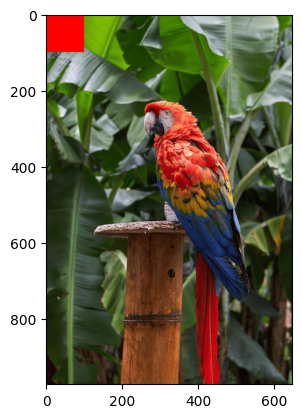

In [4]:
import matplotlib.pyplot as plt

image = './../../Data/CNNData/parrot.png'
data = plt.imread(image)
# Set the red channel in this part of the image to 1
data[:100,:100, 0] = 1

# Set the green channel in this part of the image to 0
data[:100,:100,1] = 0

# Set the blue channel in this part of the image to 0
data[:100,:100,2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

In [10]:
# One hot encoding 

import numpy as np 
# label of data
labels = []

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories==labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii,jj] = 1

In [12]:
# test_labels=[]
# predictions=[]

# # Calculate the number of correct predictions
# number_correct = (test_labels * predictions).sum()
# print(number_correct)

# # Calculate the proportion of correct predictions
# proportion_correct = number_correct/len(predictions)
# print(proportion_correct)

In [13]:
# Imports components from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# # Reshape the data to two-dimensional array
# train_data = train_data.reshape(50, 784)

# # Fit the model
# model.fit(train_data, train_labels, validation_split=0.2, epochs=3)


In [ ]:
# # Reshape test data
# test_data = test_data.reshape(10, 784)

# # Evaluate the model
# model.evaluate(test_data, test_labels)

# Convolution


In [14]:
# 1D image

array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [ ]:
# # Black and white image IM

# im = []
# kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
# result = np.zeros(im.shape)

# # Output array
# for ii in range(im.shape[0] - 3):
#     for jj in range(im.shape[1] - 3):
#         result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# # Print result
# print(result)

# Defining Kernels


In [15]:
# Define a kernel that finds horizontal lines in images.
kernel_h = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1,-1]])

# kernel finds a vertical line in images
kernel_v = np.array([[-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]])

# Define a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

# Define a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

# Implementing Convplution in Keras

In [19]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows,img_cols,1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model 
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)


In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_data,test_labels, batch_size=10)

# Tweaking your convolutions
- Padding
- Striding
- Dilated convolution

In [17]:
# Generally, we can calculate the size of the output using a simple formula: (I - K + 2P) / (S + 1)
# Where 
# I is the size of the input
# K is the size of the kernel
# P is the size of the zero padding
# S is the stride.
img_rows = 28
img_cols = 28

In [20]:
# Padding
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [21]:
# Stride 
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))